In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


(150, 2)


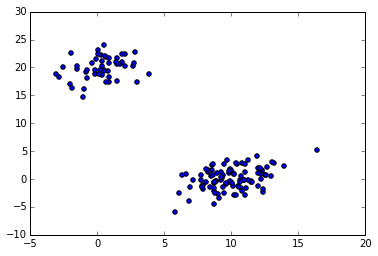

In [12]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [13]:
Z = sch.linkage(X, 'ward')

In [7]:
from scipy.spatial.distance import pdist

In [8]:
c, coph_dists = sch.cophenet(Z, pdist(X))

In [9]:
c

0.98001483875742679

In [12]:
Z[0]

array([  5.20000000e+01,   5.30000000e+01,   4.15105485e-02,
         2.00000000e+00])

In [13]:
Z[:20]

array([[  5.20000000e+01,   5.30000000e+01,   4.15105485e-02,
          2.00000000e+00],
       [  1.40000000e+01,   7.90000000e+01,   5.91375926e-02,
          2.00000000e+00],
       [  3.30000000e+01,   6.80000000e+01,   7.10677929e-02,
          2.00000000e+00],
       [  1.70000000e+01,   7.30000000e+01,   7.13712071e-02,
          2.00000000e+00],
       [  1.00000000e+00,   8.00000000e+00,   7.54313099e-02,
          2.00000000e+00],
       [  8.50000000e+01,   9.50000000e+01,   1.09277896e-01,
          2.00000000e+00],
       [  1.08000000e+02,   1.31000000e+02,   1.10071548e-01,
          2.00000000e+00],
       [  9.00000000e+00,   6.60000000e+01,   1.13022407e-01,
          2.00000000e+00],
       [  1.50000000e+01,   6.90000000e+01,   1.14289714e-01,
          2.00000000e+00],
       [  6.30000000e+01,   9.80000000e+01,   1.21200766e-01,
          2.00000000e+00],
       [  1.07000000e+02,   1.15000000e+02,   1.21671017e-01,
          2.00000000e+00],
       [  6.50000000e

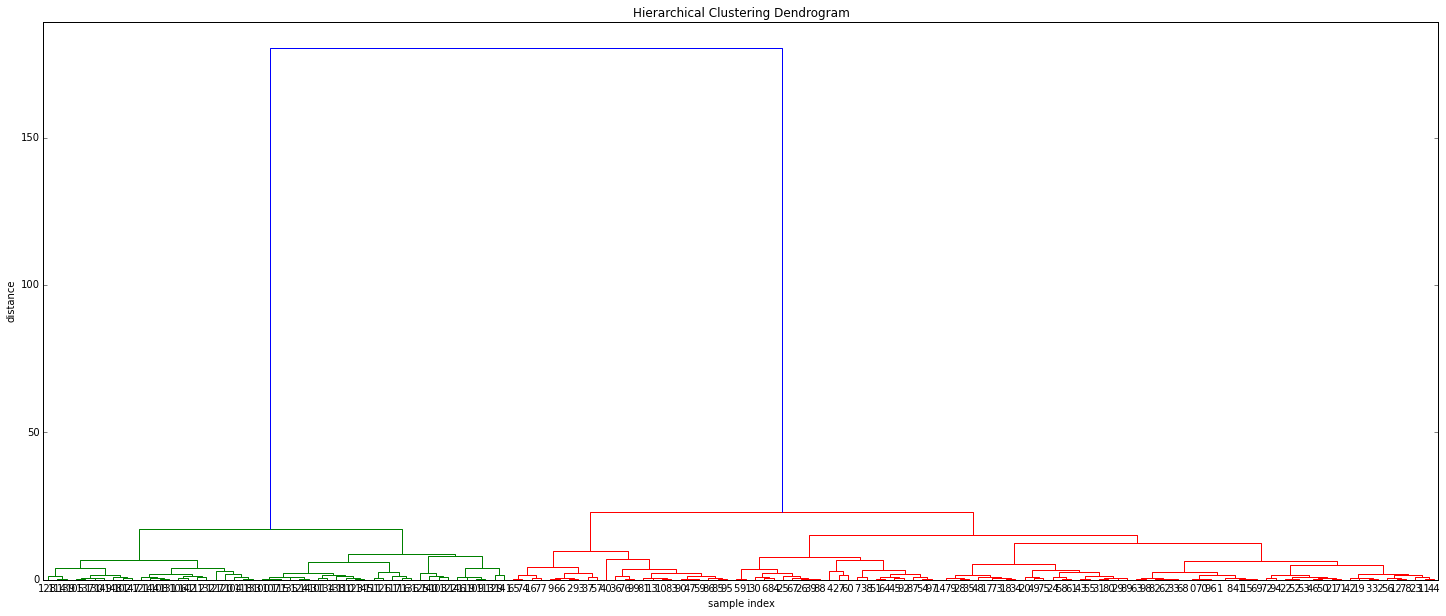

In [22]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendro =  sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

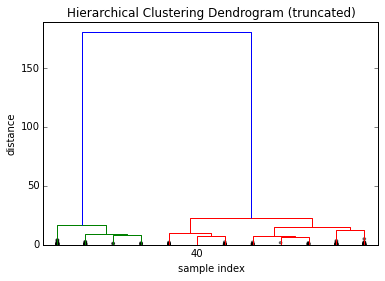

In [17]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

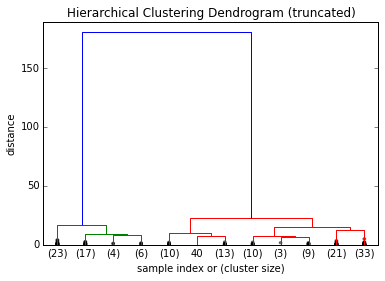

In [19]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [20]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sch.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

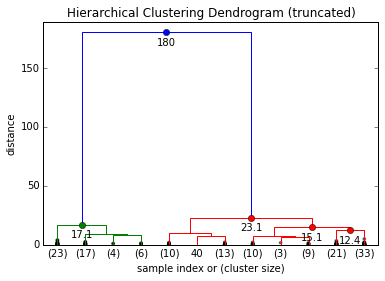

In [21]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [29]:
import scipy as sy

In [30]:
X = sy.randn(100, 2)     # 100 2-dimensional observations
d = sch.distance.pdist(X)   # vector of (100 choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

In [31]:
ind

array([4, 2, 2, 1, 3, 4, 2, 4, 5, 3, 1, 3, 2, 4, 5, 3, 4, 4, 2, 2, 3, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 2, 2, 5, 2, 2, 4, 2, 2, 2, 4, 4, 3, 4, 4, 1, 1,
       4, 2, 5, 2, 2, 2, 2, 2, 4, 5, 5, 4, 3, 4, 4, 5, 2, 2, 2, 3, 3, 3, 4,
       5, 4, 3, 5, 4, 5, 4, 3, 2, 5, 4, 3, 2, 4, 4, 2, 2, 4, 4, 2, 3, 4, 3,
       4, 5, 5, 2, 2, 2, 2, 2], dtype=int32)

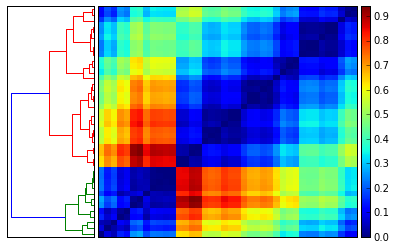

In [34]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves'] # this is thte index of each original row or column
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

# Display and save figure.
plt.show()
fig.savefig('dendrogram.png')

In [2]:
arr = np.random.randn(4,3)

In [3]:
arr

array([[-0.10986526, -0.67453203, -0.44794018],
       [ 1.97093009, -0.90526916, -0.6512536 ],
       [-0.18060537, -0.80199869, -1.39486314],
       [-0.30691686,  0.34567476,  1.28518326]])

In [4]:
arr.mean(0)

array([ 0.34338565, -0.50903128, -0.30221841])

In [5]:
demand = arr -arr.mean(0)

In [6]:
demand

array([[-0.45325091, -0.16550075, -0.14572177],
       [ 1.62754444, -0.39623788, -0.34903518],
       [-0.52399102, -0.29296741, -1.09264472],
       [-0.65030251,  0.85470604,  1.58740167]])

In [7]:
demand.mean(0)

array([ -5.55111512e-17,   2.77555756e-17,   0.00000000e+00])

In [8]:
row_means = arr.mean(1)

In [9]:
row_means

array([-0.41077916,  0.13813578, -0.79248907,  0.44131372])

In [11]:
arr - row_means.reshape((4,1))

array([[ 0.30091389, -0.26375287, -0.03716102],
       [ 1.83279431, -1.04340494, -0.78938937],
       [ 0.61188369, -0.00950962, -0.60237407],
       [-0.74823058, -0.09563896,  0.84386954]])

In [1]:
from vispy.plot import Fig

In [2]:
fig = Fig()

In [3]:
ax = fig[0, 0]
ax.plot([[0, 1], [0, 1]])